# Lecture 14: July 24th, 2024

__Announcements:__
* Yasmeen student hours rescheduled to xx:xx on Thursday.

__Today:__
* Details about final creative project
* Finish image processing unit
* Bonus: Making the square grid
* Intro to OOP

## Changing Colors: Boolean Mask

__Goal:__ Replace all `[255,255,255]` triples with `[160,234,222]` using a boolean mask.

In [1]:
from PIL import Image
import numpy as np

In [4]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

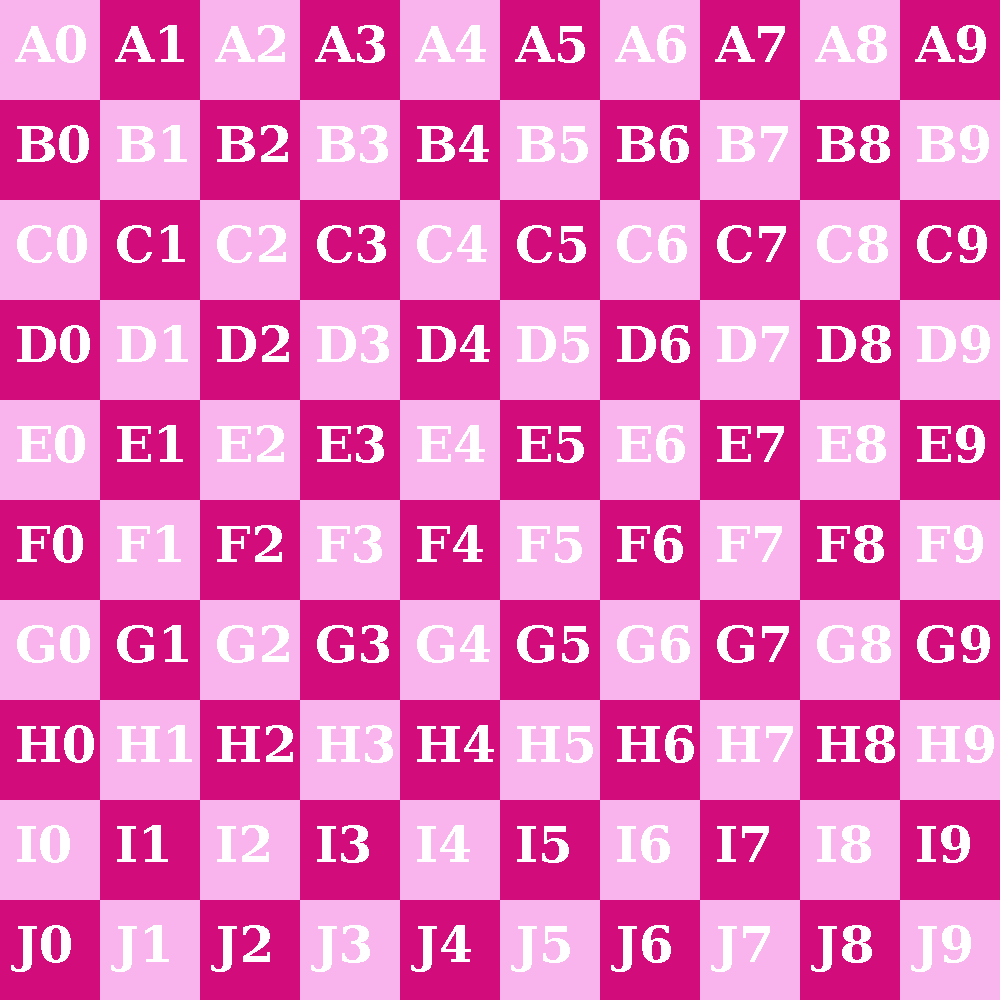

In [5]:
img

In [6]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

## Changing colors using `np.where`

__Goal:__ Replace all square background colors with random colors.

In [4]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

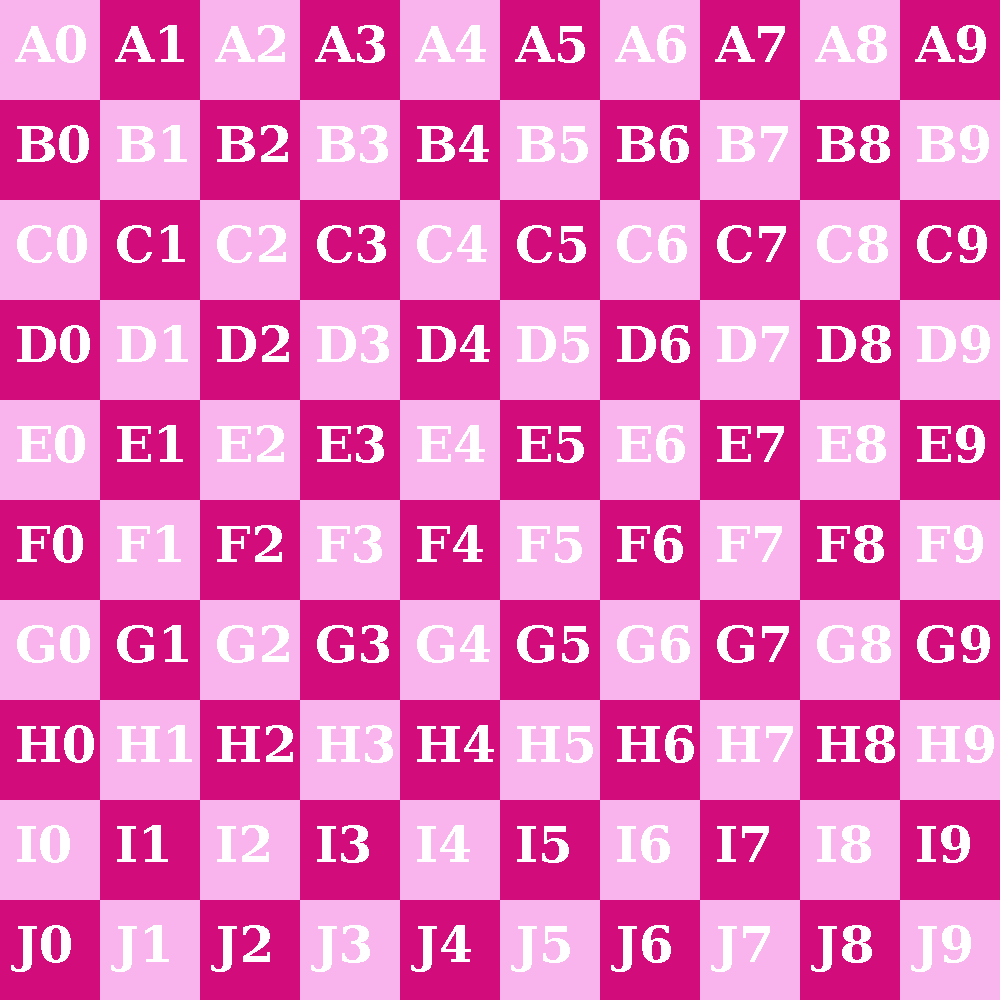

In [5]:
img

In [6]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

## Bonus: How did Yasmeen make the square grid?

In [26]:
from PIL import Image
import numpy as np
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
from itertools import product
import string

In [27]:
font = ImageFont.truetype(r"fonts/OptimusPrincepsSemiBold.ttf",50)

In [28]:
rep = np.array([[[249,180,237],[211,12,123]],[[211,12,123],[249,180,237]]],dtype=np.uint8)

In [29]:
img = Image.fromarray(rep).resize((200,200),Image.Resampling.BOX)

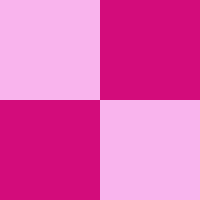

In [30]:
img

In [31]:
arr = np.asarray(img)

In [32]:
arr.shape

(200, 200, 3)

In [33]:
temp = np.zeros((1000,1000,3),dtype=np.uint8)

In [47]:
for i,j in product(range(0,900,200),repeat=2):
        temp[i:i+200,j:j+200] = arr

In [48]:
img = Image.fromarray(temp)

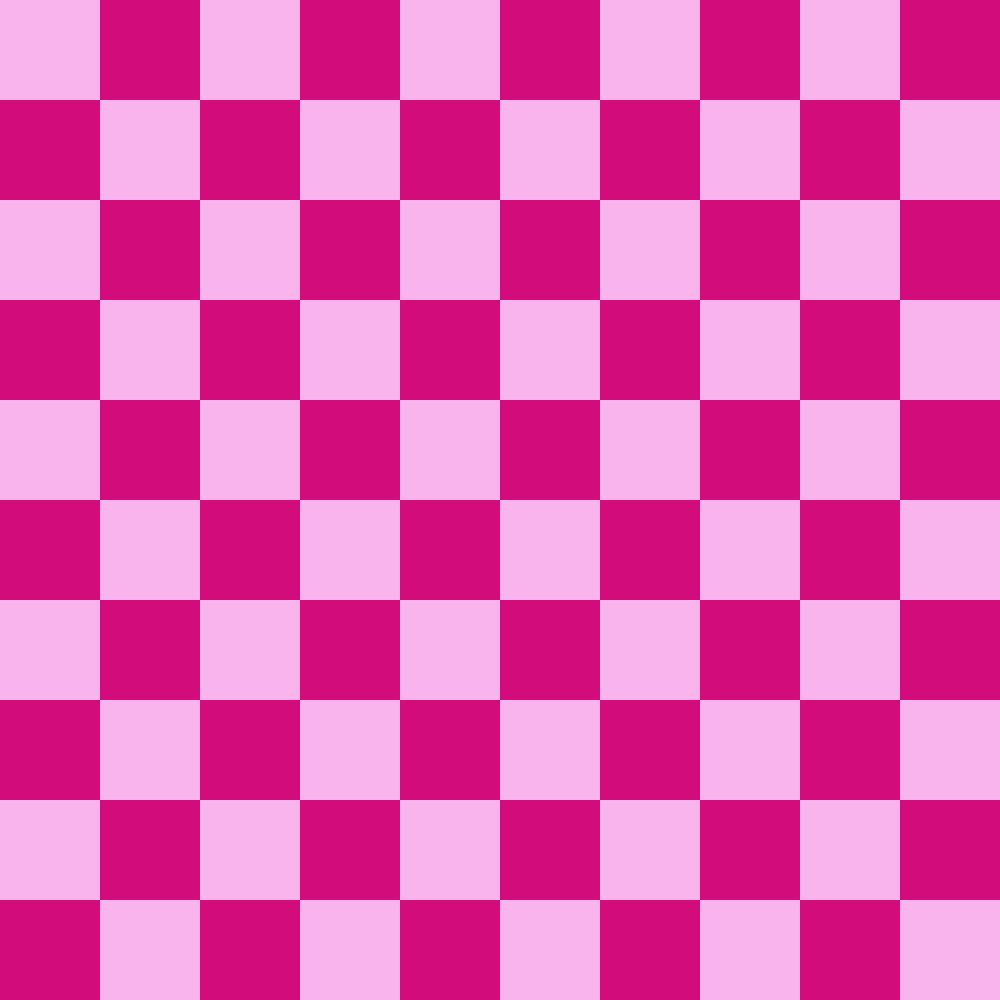

In [49]:
img

In [64]:
img = Image.fromarray(temp)
centers = product(range(15,1000,100),repeat=2)
alph = product(range(10),string.ascii_uppercase[:10])
Im = ImageDraw.Draw(img)
Im.fontmode = "1" #disable antialiasing, "L" to enable
for coord,k in zip(centers,alph):
        Im.text(coord, f"{k[1]}{k[0]}", fill=(255,255,255), font = font)


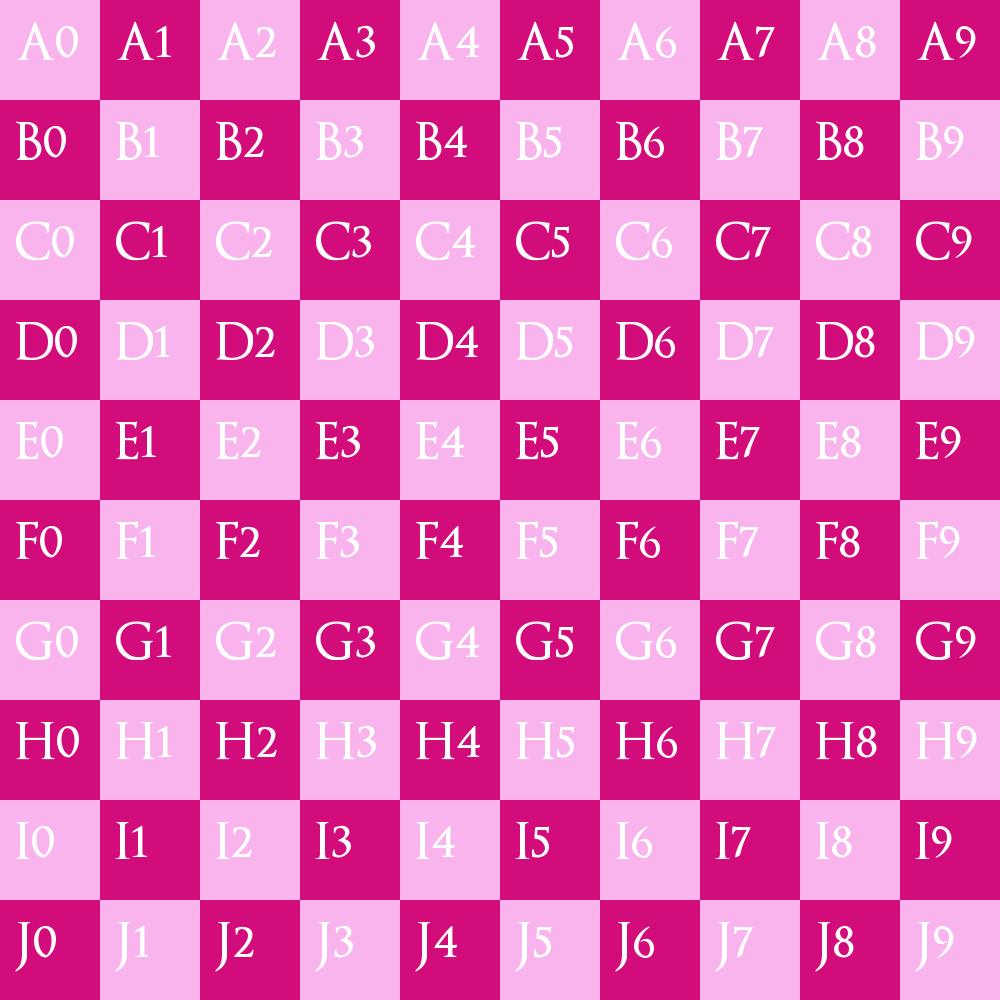

In [60]:
img

In [37]:
help(Im.text)

Help on method text in module PIL.ImageDraw:

text(xy, text, fill=None, font=None, anchor=None, spacing=4, align='left', direction=None, features=None, language=None, stroke_width=0, stroke_fill=None, embedded_color=False, *args, **kwargs) method of PIL.ImageDraw.ImageDraw instance



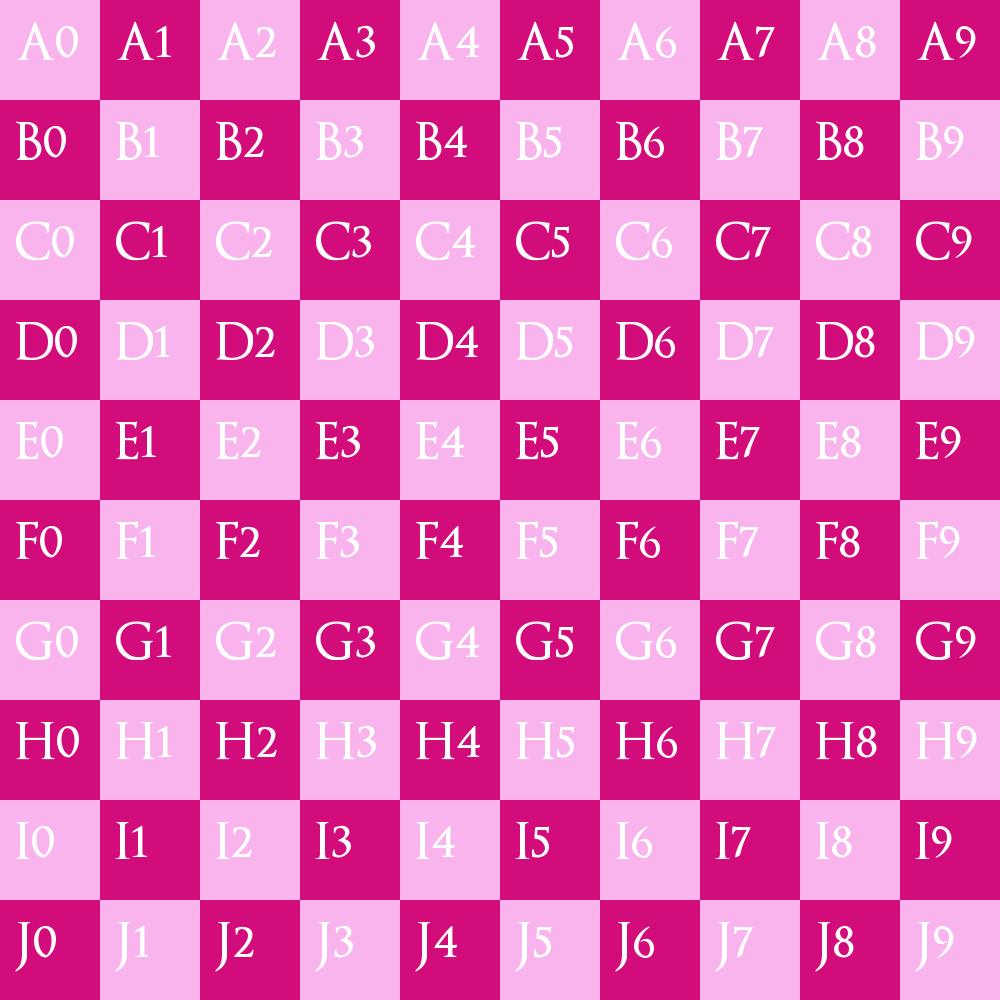

In [61]:
img

In [62]:
arr2 = np.asarray(img)

In [63]:
np.unique(arr2.reshape(-1,3),axis=0).shape

(342, 3)

In [57]:
np.unique(arr.reshape(-1,3),axis=0).shape

(2, 3)

In [58]:
img.save("images/soulsbarbie-grid.png")